In [1]:
# libraries
import urllib.request, json 
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
from sodapy import Socrata

url = "https://opendata.arcgis.com/datasets/22ff59aa04284bffac727d7d2b994262_12.geojson"
df = gpd.read_file(url)

df

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


,OBJECTID,TOOLTIP,geometry
0,1,,"POLYGON ((-118.58318 34.20087, -118.58318 34.2..."
1,2,,"POLYGON ((-118.60275 34.19565, -118.60256 34.1..."
2,3,,"POLYGON ((-118.60275 34.19549, -118.60275 34.1..."
3,4,,"POLYGON ((-118.60143 34.19549, -118.60143 34.1..."
4,5,,"POLYGON ((-118.60037 34.19549, -118.60037 34.1..."
...,...,...,...
245,246,,"POLYGON ((-118.22387 34.01692, -118.22386 34.0..."
246,247,,"POLYGON ((-118.22311 34.01632, -118.22368 34.0..."
247,248,,"POLYGON ((-118.22307 34.01605, -118.22204 34.0..."
248,249,,"POLYGON ((-118.22309 34.01605, -118.22362 34.0..."


In [2]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   OBJECTID  250 non-null    int64   
 1   TOOLTIP   250 non-null    object  
 2   geometry  250 non-null    geometry
dtypes: geometry(1), int64(1), object(1)
memory usage: 6.0+ KB


In [3]:
df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

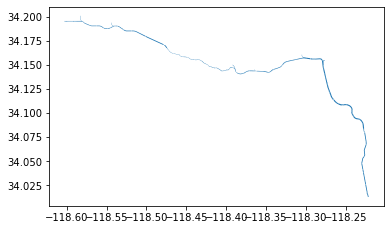

In [4]:
df.plot()

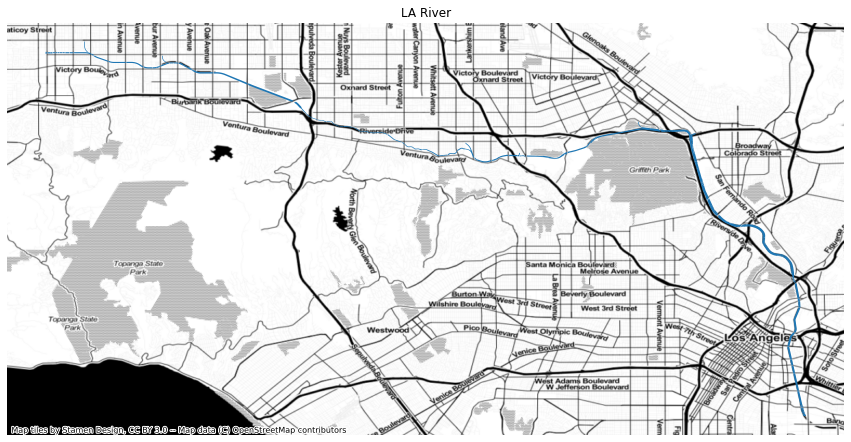

In [5]:
ax = df.plot(figsize=(15, 15))

ax.axis('off')

ax.set_title('LA River')

ctx.add_basemap(ax, source=ctx.providers.Stamen.Toner, crs=df.crs)

In [6]:
df_proj = df.to_crs(epsg=4087)

In [7]:
df_proj.crs

<Projected CRS: EPSG:4087>
Name: WGS 84 / World Equidistant Cylindrical
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Coordinate Operation:
- name: World Equidistant Cylindrical
- method: Equidistant Cylindrical
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
df_proj

,OBJECTID,TOOLTIP,geometry
0,1,,"POLYGON ((-13200619.022 3807223.287, -13200618..."
1,2,,"POLYGON ((-13202798.143 3806642.864, -13202776..."
2,3,,"POLYGON ((-13202798.090 3806624.511, -13202798..."
3,4,,"POLYGON ((-13202650.816 3806624.762, -13202650..."
4,5,,"POLYGON ((-13202533.014 3806624.962, -13202532..."
...,...,...,...
245,246,,"POLYGON ((-13160621.350 3786745.721, -13160619..."
246,247,,"POLYGON ((-13160536.125 3786679.971, -13160599..."
247,248,,"POLYGON ((-13160531.955 3786649.462, -13160417..."
248,249,,"POLYGON ((-13160534.347 3786649.410, -13160592..."


In [9]:
df['geometry 2'] = df_proj.geometry.buffer(distance=1000)

In [10]:
df

,OBJECTID,TOOLTIP,geometry,geometry 2
0,1,,"POLYGON ((-118.58318 34.20087, -118.58318 34.2...","POLYGON ((-13200620.368 3808223.286, -13200583..."
1,2,,"POLYGON ((-118.60275 34.19565, -118.60256 34.1...","POLYGON ((-13203798.139 3806639.958, -13203798..."
2,3,,"POLYGON ((-118.60275 34.19549, -118.60275 34.1...","POLYGON ((-13203796.937 3806590.594, -13203798..."
3,4,,"POLYGON ((-118.60143 34.19549, -118.60143 34.1...","POLYGON ((-13202652.511 3807624.760, -13202534..."
4,5,,"POLYGON ((-118.60037 34.19549, -118.60037 34.1...","POLYGON ((-13202534.705 3807624.960, -13202512..."
...,...,...,...,...
245,246,,"POLYGON ((-118.22387 34.01692, -118.22386 34.0...","POLYGON ((-13160642.492 3787745.498, -13160635..."
246,247,,"POLYGON ((-118.22311 34.01632, -118.22368 34.0...","POLYGON ((-13160557.860 3787679.735, -13160472..."
247,248,,"POLYGON ((-118.22307 34.01605, -118.22204 34.0...","POLYGON ((-13161444.766 3787055.268, -13161433..."
248,249,,"POLYGON ((-118.22309 34.01605, -118.22362 34.0...","POLYGON ((-13160917.145 3785636.955, -13160927..."


In [11]:
river = df.drop(columns=['geometry'])

In [12]:
river.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    250 non-null    int64   
 1   TOOLTIP     250 non-null    object  
 2   geometry 2  250 non-null    geometry
dtypes: geometry(1), int64(1), object(1)
memory usage: 6.0+ KB


In [13]:
river = river.set_geometry('geometry 2')

In [14]:
river.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    250 non-null    int64   
 1   TOOLTIP     250 non-null    object  
 2   geometry 2  250 non-null    geometry
dtypes: geometry(1), int64(1), object(1)
memory usage: 6.0+ KB


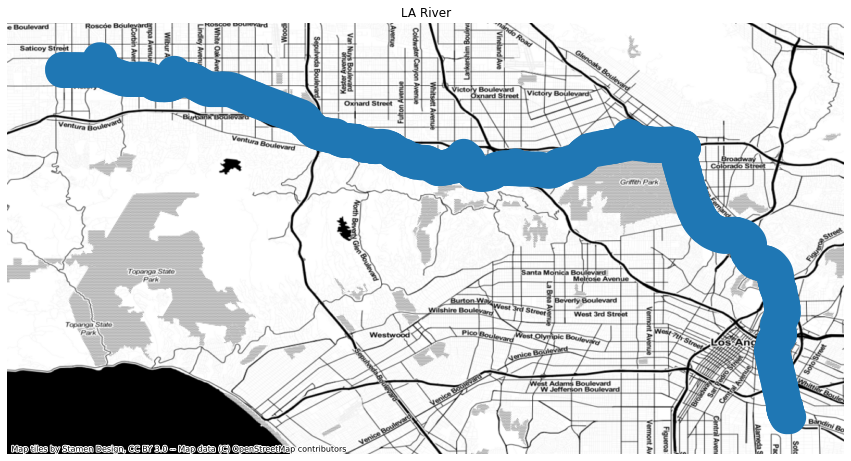

In [15]:
ax = river.plot(figsize=(15, 15))

ax.axis('off')

ax.set_title('LA River')

ctx.add_basemap(ax, source=ctx.providers.Stamen.Toner, crs=river.crs)

In [16]:
river.crs

<Projected CRS: EPSG:4087>
Name: WGS 84 / World Equidistant Cylindrical
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Coordinate Operation:
- name: World Equidistant Cylindrical
- method: Equidistant Cylindrical
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [17]:
# to get started, we will import these libraries
import urllib.request, json 
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
from sodapy import Socrata

# for interactive plots
import plotly.express as px
import folium

In [18]:
# next we will connect to the data portal to load in vacant parcel data from LA County Assessor
client = Socrata("data.lacounty.gov", None)

# The website says this dataset has 176K rows, we are going to try to call in all of them using 180K in case more have been added. However, we are also going to limit our data to Los Angeles incorporated
results = client.get("vcaw-zeg9", limit=180000, where="taxratearea_city=='LOS ANGELES'")

# We'll need to convert to pandas DataFrame
vacdf = pd.DataFrame.from_records(results)

vacdf.sample(5)

,usecodedescchar1,roll_homeownersexemp,situsunit,recordingdate,effectiveyearbuilt,istaxableparcel,roll_totlandimp,roll_perspropexemp,parcelboundarydescription,roll_landbaseyear,...,location_1,bathrooms,sqftmain,situsdirection,roll_realestateexemp,center_lat,situszip,yearbuilt,propertylocation,situszip5
5010,Residential,0,,20091216,0,Y,101494,0,WESTERN EMPIRE TRACT LOT COM AT INTER SECTION ...,2010,...,"{'latitude': '34.24459515', 'needs_recoding': ...",0,0,,0,34.24459515,,0,NaN,NaN
6111,Residential,0,,20070614,0,Y,94753,0,NORTHERN POR OF THE EX MISSION DE SAN FERNANDO...,2007,...,"{'latitude': '34.33302498', 'needs_recoding': ...",0,0,,0,34.33302498,,0,NaN,NaN
7600,Residential,0,,20140805,0,Y,1195,0,TRACT NO 1450 LOT 750,1975,...,"{'latitude': '34.12365816', 'needs_recoding': ...",0,0,,0,34.12365816,,0,NaN,NaN
19590,Residential,0,,20050602,0,Y,12014,0,TRACT # 5980 LOT 19,1975,...,"{'latitude': '34.08869459', 'needs_recoding': ...",0,0,,0,34.08869459,,0,NaN,NaN
1951,Residential,0,,20070119,0,Y,451371,0,TR=61684 LOT 3,2007,...,"{'latitude': '34.15930895', 'needs_recoding': ...",0,0,,0,34.15930895,,0,NaN,NaN


In [19]:
#reproject both datasets so I can add basemaps later when creating the loop

vacgdf = gpd.GeoDataFrame(vacdf, 
                       crs='epsg:4087',
                       geometry=gpd.points_from_xy(vacdf.center_lon, vacdf.center_lat))

/opt/conda/lib/python3.9/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 28 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


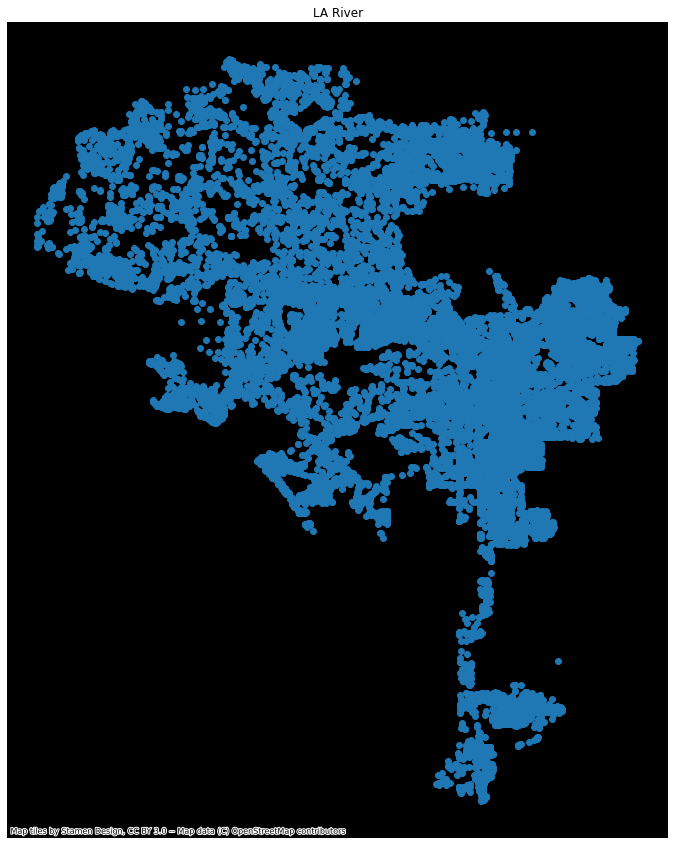

In [20]:
ax = vacgdf.plot(figsize=(15, 15))

ax.axis('off')

ax.set_title('LA River')

ctx.add_basemap(ax, source=ctx.providers.Stamen.Toner, crs=river.crs)

In [21]:
vacgdf.crs

<Projected CRS: EPSG:4087>
Name: WGS 84 / World Equidistant Cylindrical
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Coordinate Operation:
- name: World Equidistant Cylindrical
- method: Equidistant Cylindrical
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [22]:
# conduct a spatial join (assign each vacant lot to the neighborhood it is in)
vac_by_river = gpd.sjoin(vacgdf, river) 

#Spatial join Points to polygons
vac_by_river

,usecodedescchar1,roll_homeownersexemp,situsunit,recordingdate,effectiveyearbuilt,istaxableparcel,roll_totlandimp,roll_perspropexemp,parcelboundarydescription,roll_landbaseyear,...,roll_realestateexemp,center_lat,situszip,yearbuilt,propertylocation,situszip5,geometry,index_right,OBJECTID,TOOLTIP


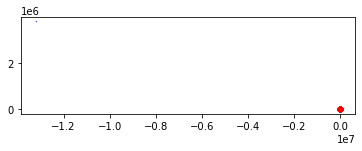

In [23]:
ax = river.plot(color='blue')
vacgdf.plot(ax=ax, marker='o', color='red', markersize=20)
plt.show()